In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [75]:
# Step 1: Load Data

# df: methylation beta matrix (CpG probes x TCGA samples)
# probe_df: CpG probe annotations

# Load data
df = pd.read_csv(
        "/Users/kanadb/Work/IIT-KGP Summer/cancer-research/datasets/UCSC-Xena-DNA-Methylation-450k/TCGA.BRCA.sampleMap_HumanMethylation450", 
        sep='\t',
        index_col=0
    )

print(df.shape)
df.head()

(485577, 888)


,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-AR-A1AJ-01,TCGA-AC-A62Y-01,TCGA-E9-A1QZ-01,TCGA-E9-A1R2-01,TCGA-E9-A3X8-01,...,TCGA-BH-A0DI-01,TCGA-E2-A1IG-01,TCGA-E2-A107-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-D8-A27E-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-AR-A0U0-01
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.0192,0.2032,0.3003,0.0287,0.0382,0.0426,0.0240,0.2907,0.0293,0.0300,...,0.0481,0.0263,0.5187,0.0757,0.0458,0.0309,0.0412,0.0452,0.0492,0.0445
cg00651829,0.0179,0.2890,0.0892,0.0234,0.0260,0.0310,0.0228,0.0255,0.0221,0.0258,...,0.0247,0.0166,0.0154,0.0420,0.0262,0.0273,0.0247,0.0214,0.0247,0.0192
cg17027195,0.0367,0.0750,0.0333,0.0460,0.0411,0.1116,0.0386,0.0372,0.0384,0.0423,...,0.0765,0.0415,0.0595,0.0664,0.0370,0.0665,0.0387,0.0663,0.0425,0.0320
cg09868354,0.0655,0.1370,0.0770,0.0688,0.0562,0.0472,0.0874,0.0926,0.0532,0.0570,...,0.0433,0.0483,0.0622,0.1302,0.0495,0.0404,0.0693,0.0739,0.2753,0.0920
cg03050183,0.0748,0.1251,0.6269,0.0947,0.1677,0.0670,0.0712,0.2560,0.0892,0.1996,...,0.5668,0.0813,0.1082,0.1422,0.0986,0.1013,0.0529,0.1042,0.3801,0.3857


In [76]:
# Rows with any NaN entry
print(df.isna().any(axis=1).sum())
df[df.isna().any(axis=1)]

121707


,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-AR-A1AJ-01,TCGA-AC-A62Y-01,TCGA-E9-A1QZ-01,TCGA-E9-A1R2-01,TCGA-E9-A3X8-01,...,TCGA-BH-A0DI-01,TCGA-E2-A1IG-01,TCGA-E2-A107-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-D8-A27E-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-AR-A0U0-01
sample,,,,,,,,,,,,,,,,,,,,,
cg09868354,0.0655,0.1370,0.0770,0.0688,0.0562,0.0472,0.0874,0.0926,0.0532,0.0570,...,0.0433,0.0483,0.0622,0.1302,0.0495,0.0404,0.0693,0.0739,0.2753,0.0920
cg01989731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg06819656,0.9028,0.8047,0.8755,0.8556,0.8575,0.8345,0.8665,0.8654,0.8678,0.9194,...,0.9322,0.9029,0.9159,0.8341,0.9123,0.8591,0.8320,0.9066,0.7365,0.8886
cg25970726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg25428494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg04487150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg05534403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg04487158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Rows with all NaN entries
print(df.isna().all(axis=1).sum())
df[df.isna().all(axis=1)]

89512


,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-AR-A1AJ-01,TCGA-AC-A62Y-01,TCGA-E9-A1QZ-01,TCGA-E9-A1R2-01,TCGA-E9-A3X8-01,...,TCGA-BH-A0DI-01,TCGA-E2-A1IG-01,TCGA-E2-A107-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-D8-A27E-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-AR-A0U0-01
sample,,,,,,,,,,,,,,,,,,,,,
cg01989731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg25970726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg25428494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg18425908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg19698294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg04487150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg05534403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg04487158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Convert all values to float, set non-numeric values to NaN
# df = df.apply(pd.to_numeric, errors='coerce')

In [79]:
# Remove probes with too many missing values
threshold = 0.2  # remove probes with >20% NaNs
probe_valid_mask = df.isna().mean(axis=1) <= threshold
df = df.loc[probe_valid_mask]

In [80]:
# Normal samples
normal_cols = [col for col in df.columns if col.endswith("11")]
normal_count = len(normal_cols)

# Tumor samples
tumor_cols = [col for col in df.columns if col.endswith("01")]
tumor_count = len(tumor_cols)

print(f"Number of Normal samples: {normal_count}")
print(f"Number of Tumor samples: {tumor_count}")

Number of Normal samples: 98
Number of Tumor samples: 785


In [81]:
# Other Columns
other_cols = [col for col in df.columns if not col.endswith("11") and not col.endswith("01")]
other_cols

['TCGA-E2-A15K-06',
 'TCGA-AC-A6IX-06',
 'TCGA-BH-A18V-06',
 'TCGA-BH-A1ES-06',
 'TCGA-BH-A1FE-06']

In [82]:
# Load Probe Map
probe_df = pd.read_csv(
        "/Users/kanadb/Work/IIT-KGP Summer/cancer-research/datasets/UCSC-Xena-DNA-Methylation-450k/probeMap_illuminaMethyl450_hg19_GPL16304_TCGAlegacy", 
        sep='\t',
        index_col=0
    )

print(probe_df.shape)
probe_df.head()

(395985, 5)


,gene,chrom,chromStart,chromEnd,strand
#id,,,,,
cg13332474,.,chr7,25935146,25935148,.
cg00651829,"RSPH14,GNAZ",chr22,23413065,23413067,.
cg17027195,AUTS2,chr7,69064092,69064094,.
cg22461835,ADRA1A,chr8,26723364,26723366,.
cg03050183,AP5B1,chr11,65547777,65547779,.


In [83]:
# Step 2: Promoter Regions Assumed

# Assume probe_df chromStart–chromEnd defines promoter region per probe
# Using the 'gene' column to map probes to genes

In [84]:
# Step 3: Map CpG probes to genes

# Filter out probes with no associated gene
probe_df_filtered = probe_df[probe_df['gene'].notna() & (probe_df['gene'] != '.')]

# Create gene -> list of probes mapping
gene_to_probes = defaultdict(list)

for probe_id, row in probe_df_filtered.iterrows(): # iterates over rows -> for each row -> returns (index, Series) pairs
    gene_list = row['gene'].split(',')  # Some probes map to multiple genes
    for gene in gene_list:
        gene_to_probes[gene.strip()].append(probe_id)

print(f"Total genes with promoter probes: {len(gene_to_probes)}")
# gene_to_probes.head()

Total genes with promoter probes: 34013


In [85]:
# Step 4: Average beta values per gene per sample

# For each gene, average beta values across its promoter probes
gene_matrix = {}

for gene, probes in gene_to_probes.items(): # iterates over columns -> for each column -> returns (column_name, Series) pair
    valid_probes = [probe for probe in probes if probe in df.index]
    if len(valid_probes) == 0:
        continue
    gene_matrix[gene] = df.loc[valid_probes].mean(axis=0)  # Average over probes

# Convert to dataframe -> rows=genes, cols=samples
gene_df = pd.DataFrame(gene_matrix).T # Transpose matrix

print("Gene-level methylation matrix shape:", gene_df.shape)
gene_df.head()

Gene-level methylation matrix shape: (33936, 888)


,TCGA-OL-A66H-01,TCGA-3C-AALK-01,TCGA-AC-A5EH-01,TCGA-EW-A2FW-01,TCGA-E9-A1R0-01,TCGA-AR-A1AJ-01,TCGA-AC-A62Y-01,TCGA-E9-A1QZ-01,TCGA-E9-A1R2-01,TCGA-E9-A3X8-01,...,TCGA-BH-A0DI-01,TCGA-E2-A1IG-01,TCGA-E2-A107-01,TCGA-5L-AAT0-01,TCGA-E9-A1NH-01,TCGA-D8-A27E-01,TCGA-AR-A24Q-01,TCGA-BH-A1F0-01,TCGA-E9-A1RB-11,TCGA-AR-A0U0-01
RSPH14,0.415603,0.459029,0.412656,0.436672,0.416900,0.395194,0.414039,0.408553,0.432033,0.419861,...,0.406642,0.399742,0.442094,0.395283,0.424286,0.368692,0.423931,0.421878,0.445036,0.422257
GNAZ,0.529119,0.541656,0.523069,0.569231,0.549425,0.535325,0.511100,0.533944,0.566062,0.534344,...,0.505106,0.531687,0.517100,0.480619,0.520394,0.439950,0.478550,0.536075,0.543700,0.533706
AUTS2,0.581514,0.661577,0.663570,0.674416,0.676781,0.657707,0.660084,0.651640,0.678810,0.666657,...,0.668451,0.651899,0.678315,0.620784,0.678496,0.675058,0.657447,0.670199,0.717632,0.634668
ADRA1A,0.378092,0.458208,0.262012,0.361084,0.350416,0.386660,0.458120,0.363156,0.468744,0.424716,...,0.429488,0.434200,0.352896,0.371862,0.419192,0.422032,0.435876,0.363828,0.480324,0.400596
AP5B1,0.509231,0.498912,0.690781,0.506850,0.529581,0.495350,0.476394,0.533631,0.431462,0.516431,...,0.651706,0.491331,0.524663,0.507919,0.505094,0.484075,0.453900,0.466694,0.559787,0.542950


In [86]:
# Step 5: Batch Correction

# Skip as UCSC Xena processed data is typically batch corrected (Level 3)

In [87]:
# Step 6: Match tumor and normal samples

def get_base_sample_id(tcga_id):
    return "-".join(tcga_id.split("-")[:3])

    # 01A and 11A sample types only (exclude replicates or non-primary tumors)
    # parts = tcga_id.split("-")
    # return "-".join(parts[:3]) if parts[3].startswith(("01A", "11A")) else None

tumor = {get_base_sample_id(col) for col in gene_df.columns if col.endswith("01")}
normal = {get_base_sample_id(col) for col in gene_df.columns if col.endswith("11")}

# Find intersection
matched_samples = normal.intersection(tumor)

print(f"Number of matched sample pairs (01 and 11): {len(matched_samples)}")

# All matched samples
# print(matched_samples)

# Preview matched samples
print("Matched sample base IDs:")
for sample_id in sorted(matched_samples)[:5]:
    print(sample_id)

Number of matched sample pairs (01 and 11): 92
Matched sample base IDs:
TCGA-A7-A0D9
TCGA-A7-A0DC
TCGA-A7-A13E
TCGA-A7-A13F
TCGA-A7-A13G


In [88]:
# Build tumor and normal sample column names from matched base IDs
matched_sample_ids = sorted(matched_samples)  # Sort for reproducibility

matched_tumor_cols = [sample_id + "-01" for sample_id in matched_sample_ids]
matched_normal_cols = [sample_id + "-11" for sample_id in matched_sample_ids]

# Subset gene methylation dataframe to tumor and normal matched columns
tumor_df = gene_df[matched_tumor_cols]
normal_df = gene_df[matched_normal_cols]

# Rename columns to base sample IDs for clarity
tumor_df.columns = matched_sample_ids
normal_df.columns = matched_sample_ids

# Sanity check
assert all(tumor_df.columns == normal_df.columns), "Mismatch in tumor and normal column orders!"

# Preview tumor and normal DataFrames
print("Tumor methylation DataFrame:")
print(tumor_df.iloc[:5, :4])
print(tumor_df.shape)

print("\nNormal methylation DataFrame:")
print(normal_df.iloc[:5, :4])
print(normal_df.shape)

Tumor methylation DataFrame:
        TCGA-A7-A0D9  TCGA-A7-A0DC  TCGA-A7-A13E  TCGA-A7-A13F
RSPH14      0.451950      0.395569      0.398356      0.503439
GNAZ        0.579806      0.558225      0.537644      0.565550
AUTS2       0.679875      0.594688      0.669601      0.663866
ADRA1A      0.477708      0.421484      0.565208      0.363024
AP5B1       0.508319      0.493025      0.490425      0.530312
(33936, 92)

Normal methylation DataFrame:
        TCGA-A7-A0D9  TCGA-A7-A0DC  TCGA-A7-A13E  TCGA-A7-A13F
RSPH14      0.391228      0.391292      0.386503      0.378919
GNAZ        0.513769      0.519406      0.503806      0.485775
AUTS2       0.684581      0.682546      0.686346      0.687763
ADRA1A      0.344452      0.425708      0.365748      0.403948
AP5B1       0.474056      0.517506      0.480819      0.490819
(33936, 92)


In [89]:
# Step 7: Compute differential methylation

# Compute Delta Beta = Tumor - Normal methylation values per matched sample
delta_beta_df = tumor_df - normal_df

# Replace NaNs with 0
delta_beta_df = delta_beta_df.fillna(0)

# Preview Delta Beta matrix (genes × matched samples)
print("Delta Beta matrix (delta_beta_df):")
print(delta_beta_df.iloc[:5, :5])
print(delta_beta_df.shape)

Delta Beta matrix (delta_beta_df):
        TCGA-A7-A0D9  TCGA-A7-A0DC  TCGA-A7-A13E  TCGA-A7-A13F  TCGA-A7-A13G
RSPH14      0.060722      0.004278      0.011853      0.124519      0.020528
GNAZ        0.066038      0.038819      0.033837      0.079775      0.036322
AUTS2      -0.004706     -0.087858     -0.016745     -0.023897     -0.122113
ADRA1A      0.133256     -0.004224      0.199460     -0.040924      0.143980
AP5B1       0.034262     -0.024481      0.009606      0.039494      0.162763
(33936, 92)


In [90]:
# Compute average Delta Beta per gene (i.e., mean across matched patients)
avg_delta_beta = delta_beta_df.mean(axis=1)  # axis=1 -> row wise mean per gene

avg_delta_beta_df.index.name = 'gene'
avg_delta_beta_df = avg_delta_beta.to_frame(name="avg_delta_beta")

# Preview final differential methylation results
print("Average Delta Beta per gene (Top 5):")
print(avg_delta_beta_df.head())

Average Delta Beta per gene (Top 5):
        avg_delta_beta
RSPH14        0.030113
GNAZ          0.035594
AUTS2        -0.030273
ADRA1A        0.006622
AP5B1        -0.016035


In [91]:
# Sort by Delta Beta to get top hyper/hypomethylated genes
avg_delta_beta_df_sorted = avg_delta_beta_df.sort_values(by="avg_delta_beta", ascending=False)

print(avg_delta_beta_df_sorted.shape)

print("\nTop 5 hypermethylated genes:")
print(avg_delta_beta_df_sorted.head())

print("\nTop 5 hypomethylated genes:")
print(avg_delta_beta_df_sorted.tail())

# Save to CSV
avg_delta_beta_df_sorted.to_csv("UCSC-TCGA-BRCA-Differential-Methylation420k_Avg-Delta-Beta_Feature-Matrix.csv")

(33936, 1)

Top 5 hypermethylated genes:
               avg_delta_beta
LINC00165            0.417463
RP11-365O16.1        0.408737
CTD-2187J20.1        0.394821
RP3-503A6.2          0.382202
RP11-69M1.3          0.377579

Top 5 hypomethylated genes:
               avg_delta_beta
OR2M3               -0.366702
RP11-331H2.4        -0.378291
RP11-654C22.2       -0.380296
LINC00184           -0.383863
OR2M7               -0.409404


In [92]:
# Flag biologically significant changes (|Delta Beta| >= 0.2)
significant_genes = avg_delta_beta_df[np.abs(avg_delta_beta_df["avg_delta_beta"]) >= 0.2]
print("Number of significantly differentially methylated genes:", len(significant_genes))

Number of significantly differentially methylated genes: 965


In [93]:
# PLOT (for all genes) - USING SNS

# # Set up figure
# plt.figure(figsize=(16, 12))

# # Subset of gene names to display every 300th gene
# yticks_step = 300
# ytick_labels = delta_beta_df.index[::yticks_step]
# ytick_locs = np.arange(0, delta_beta_df.shape[0], yticks_step)

# # Draw heatmap
# sns.heatmap(
#     delta_beta_df,
#     cmap="RdBu_r",
#     center=0,
#     xticklabels=False,
#     yticklabels=False  # Manually set these
# )

# # Manually add gene labels at intervals
# plt.yticks(ticks=ytick_locs + 0.5, labels=ytick_labels, rotation=0, fontsize=8)  # +0.5 centers tick labels

# # Titles and axis labels
# plt.title("Methylation Delta Beta Heatmap (Tumor - Normal) for All Genes")
# plt.xlabel("Matched Samples")
# plt.ylabel("Genes")

# # Adjust layout
# plt.tight_layout()
# plt.show()

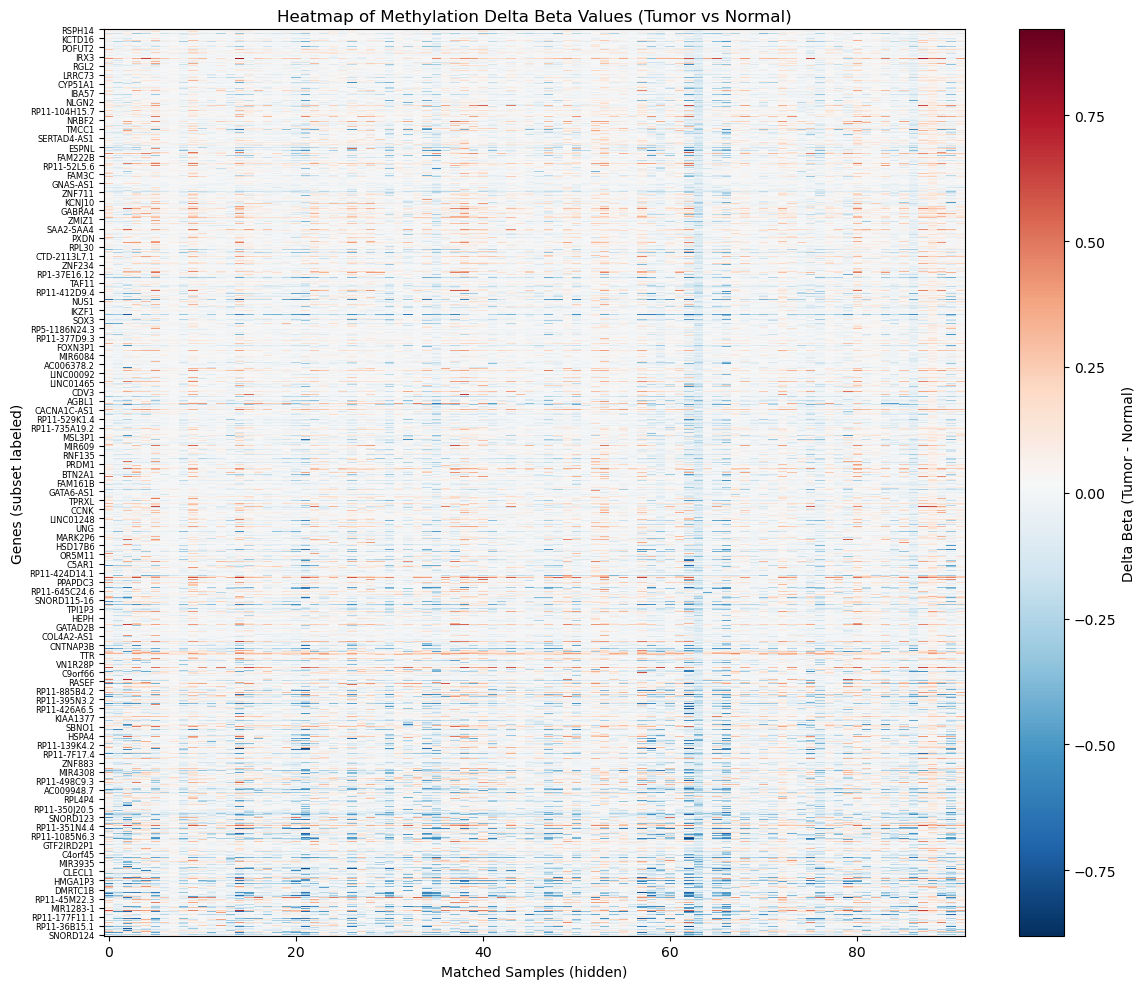

In [94]:
# PLOT (for all genes)
plt.figure(figsize=(12, 10))

# Use interpolation='none' to disable smoothing and preserve exact data values in the heatmap
plt.imshow(delta_beta_df.values, aspect='auto', cmap='RdBu_r', interpolation='none')

# Set colorbar (legend)
plt.colorbar(label='Delta Beta (Tumor - Normal)')

# Compute how often to show gene names to avoid clutter
yticks_every = max(len(delta_beta_df.index) // 100, 1)  # Show ~100 gene names max

# Set Y-axis ticks (gene name at every 'yticks_every' interval)
plt.yticks(
    ticks=range(0, len(delta_beta_df.index), yticks_every),
    labels=[delta_beta_df.index[i] for i in range(0, len(delta_beta_df.index), yticks_every)],
    fontsize=6
)

plt.xlabel('Matched Samples (hidden)')
plt.ylabel('Genes (subset labeled)')
plt.title('Heatmap of Methylation Delta Beta Values (Tumor vs Normal)')
plt.tight_layout()
plt.show()

In [95]:
# Plot for top 50 Hypo and Hyper Methylated genes - USING SNS

# # Top 50 hypermethylated genes (highest positive ΔBeta)
# top_hyper = avg_delta_beta_df_sorted.head(50).index

# # Top 50 hypomethylated genes (most negative ΔBeta)
# top_hypo = avg_delta_beta_df_sorted.tail(50).index

# # Subset Delta Beta matrix
# delta_hyper = delta_beta_df.loc[top_hyper]
# delta_hypo = delta_beta_df.loc[top_hypo]

# # Set figure size and color map
# plt.figure(figsize=(12, 10))
# sns.heatmap(delta_hyper, cmap="Reds", center=0, xticklabels=False)
# plt.title("Top 50 Hypermethylated Genes (ΔBeta: Tumor - Normal)")
# plt.xlabel("Matched Samples")
# plt.ylabel("Genes")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 10))
# sns.heatmap(delta_hypo, cmap="Blues", center=0, xticklabels=False)
# plt.title("Top 50 Hypomethylated Genes (ΔBeta: Tumor - Normal)")
# plt.xlabel("Matched Samples")
# plt.ylabel("Genes")
# plt.tight_layout()
# plt.show()

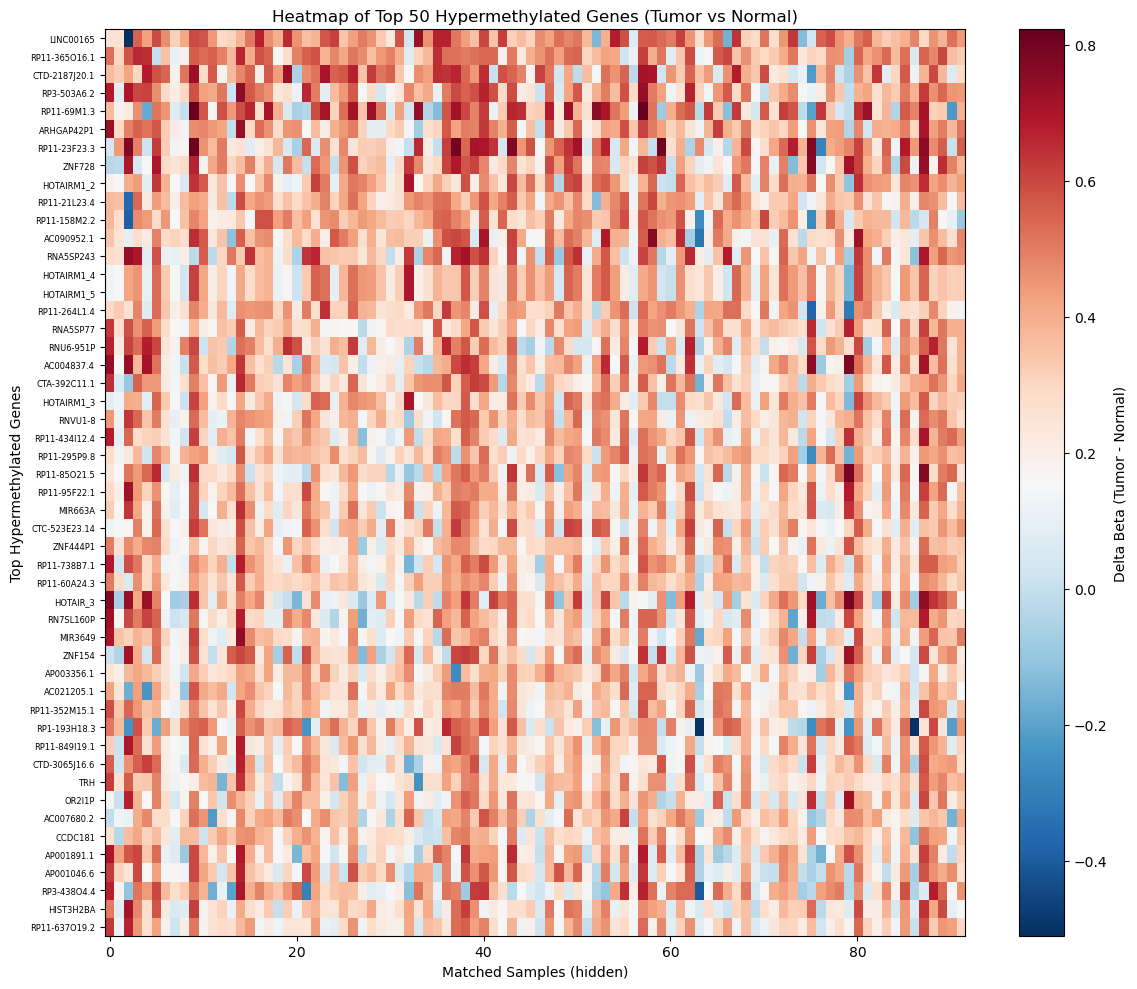

In [96]:
# TOP 50 HYPERMETHYLATED GENES

# Subset Delta Beta matrix
top_hyper = avg_delta_beta_df_sorted.head(50).index
delta_hyper = delta_beta_df.loc[top_hyper]

plt.figure(figsize=(12, 10))

plt.imshow(delta_hyper.values, aspect='auto', cmap='RdBu_r', interpolation='none')
plt.colorbar(label='Delta Beta (Tumor - Normal)')

yticks_every = max(len(delta_hyper.index) // 50, 1)  # Show all or every few gene names

plt.yticks(
    ticks=range(0, len(delta_hyper.index), yticks_every),
    labels=[delta_hyper.index[i] for i in range(0, len(delta_hyper.index), yticks_every)],
    fontsize=6
)

plt.xlabel('Matched Samples (hidden)')
plt.ylabel('Top Hypermethylated Genes')
plt.title('Heatmap of Top 50 Hypermethylated Genes (Tumor vs Normal)')
plt.tight_layout()
plt.show()

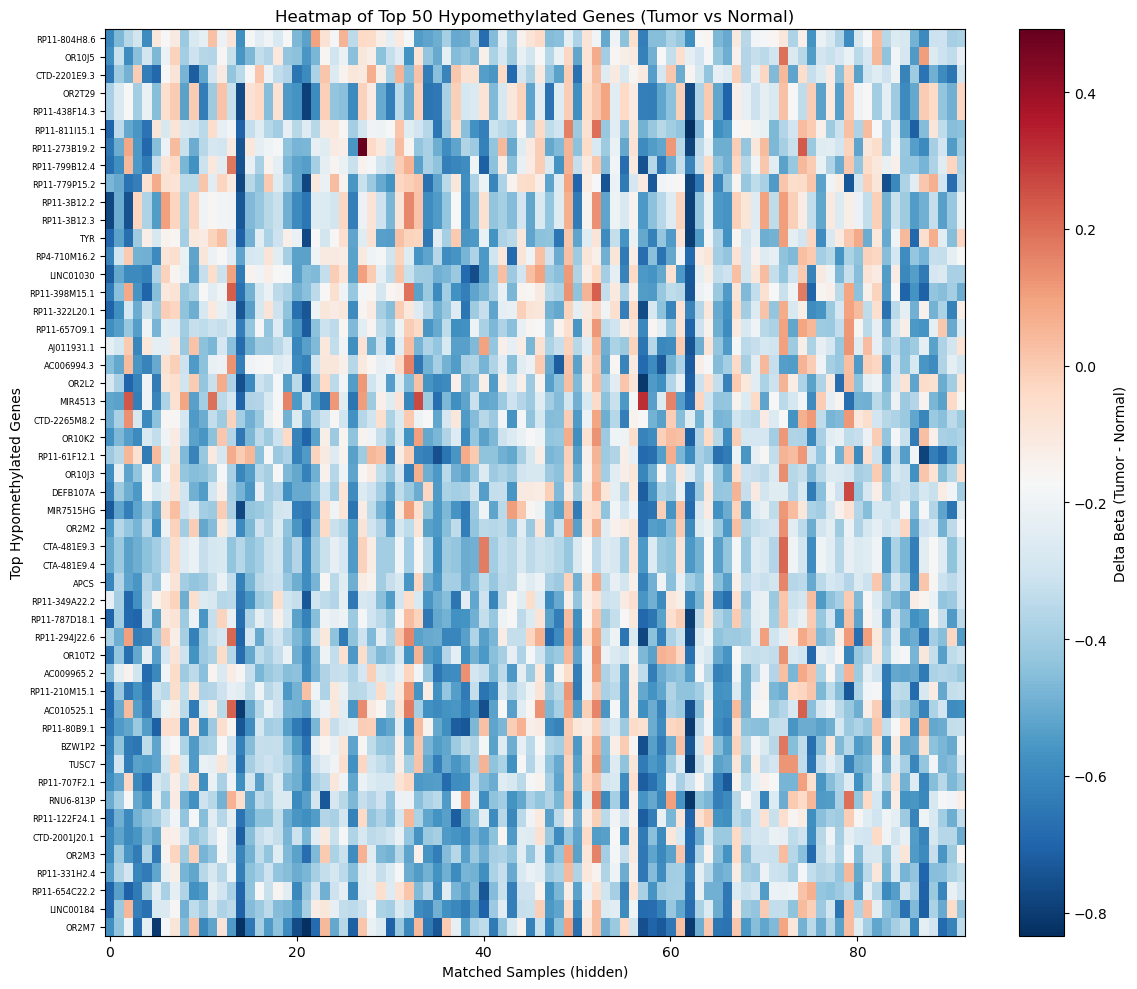

In [97]:
# TOP 50 HYPOMETHYLATED GENES

# Subset Delta Beta matrix
top_hypo = avg_delta_beta_df_sorted.tail(50).index
delta_hypo = delta_beta_df.loc[top_hypo]

plt.figure(figsize=(12, 10))

plt.imshow(delta_hypo.values, aspect='auto', cmap='RdBu_r', interpolation='none')
plt.colorbar(label='Delta Beta (Tumor - Normal)')

yticks_every = max(len(delta_hypo.index) // 50, 1)

plt.yticks(
    ticks=range(0, len(delta_hypo.index), yticks_every),
    labels=[delta_hypo.index[i] for i in range(0, len(delta_hypo.index), yticks_every)],
    fontsize=6
)

plt.xlabel('Matched Samples (hidden)')
plt.ylabel('Top Hypomethylated Genes')
plt.title('Heatmap of Top 50 Hypomethylated Genes (Tumor vs Normal)')
plt.tight_layout()
plt.show()

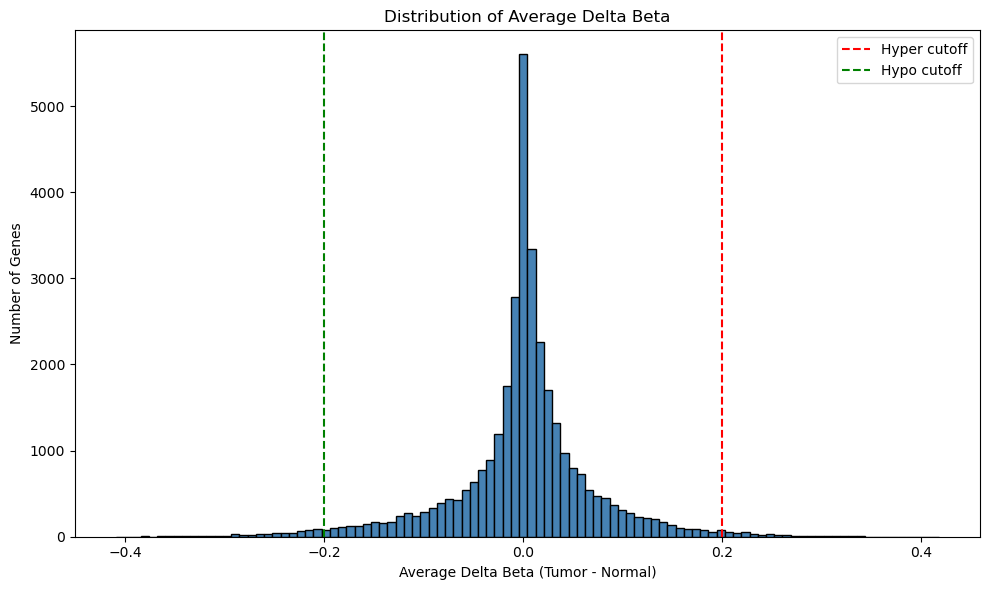

In [102]:
# Distribution plot
plt.figure(figsize=(10, 6))
plt.hist(avg_delta_beta_df_sorted["avg_delta_beta"], bins=100, color='steelblue', edgecolor='black')
plt.axvline(0.2, color='red', linestyle='--', label='Hyper cutoff')
plt.axvline(-0.2, color='green', linestyle='--', label='Hypo cutoff')
plt.title("Distribution of Average Delta Beta")
plt.xlabel("Average Delta Beta (Tumor - Normal)")
plt.ylabel("Number of Genes")
plt.legend()
plt.tight_layout()
plt.show()

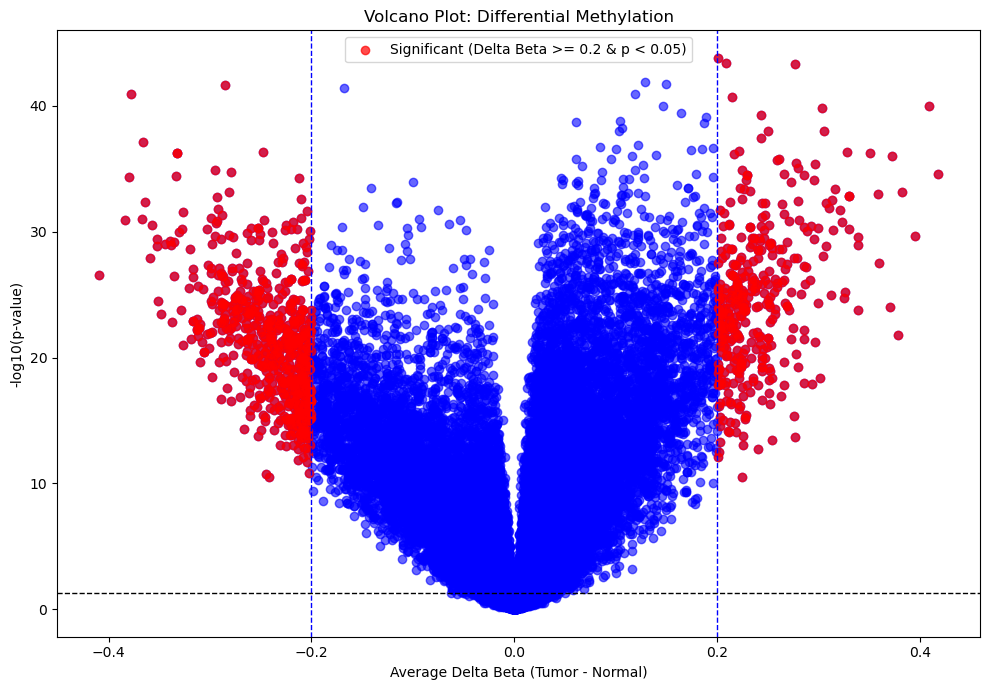

In [101]:
from scipy.stats import ttest_rel

# Step 8: Statistical testing

# Paired t-test for each gene across matched tumor vs normal samples
p_values = []

for gene in avg_delta_beta_df_sorted.index:
    t_stat, p_val = ttest_rel(tumor_df.loc[gene], normal_df.loc[gene], nan_policy='omit')
    p_values.append(p_val)

# Add to dataframe
avg_delta_beta_df_sorted['p_value'] = p_values

# Compute -log10(p-value)
avg_delta_beta_df_sorted['-log10_p'] = -np.log10(avg_delta_beta_df_sorted['p_value'])

# Volcano Plot
plt.figure(figsize=(10, 7))
plt.scatter(
    avg_delta_beta_df_sorted['avg_delta_beta'],
    avg_delta_beta_df_sorted['-log10_p'],
    c='blue', alpha=0.6
)

# Highlight significant genes
significant = (np.abs(avg_delta_beta_df_sorted['avg_delta_beta']) >= 0.2) & (avg_delta_beta_df_sorted['p_value'] < 0.05)
plt.scatter(
    avg_delta_beta_df_sorted.loc[significant, 'avg_delta_beta'],
    avg_delta_beta_df_sorted.loc[significant, '-log10_p'],
    c='red', alpha=0.7, label='Significant (Delta Beta >= 0.2 & p < 0.05)'
)

# Reference lines
plt.axvline(0.2, color='blue', linestyle='--', linewidth=1)
plt.axvline(-0.2, color='blue', linestyle='--', linewidth=1)
plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=1)

plt.xlabel('Average Delta Beta (Tumor - Normal)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot: Differential Methylation')
plt.legend()
plt.tight_layout()
plt.show()